In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("data.csv")

In [7]:
data.head()

,Unnamed: 0,Survived,Pclass,Age,cat_male,cat_Q,cat_S,cat_Miss,cat_Mr,cat_Mrs,cat_Other,cat_big,cat_small
0,0,0,-1,22.0,1,0,1,0,1,0,0,0,1
1,1,1,1,38.0,0,0,0,0,0,1,0,0,1
2,2,1,-1,26.0,0,0,1,1,0,0,0,0,0
3,3,1,1,35.0,0,0,1,0,0,1,0,0,1
4,4,0,-1,35.0,1,0,1,0,1,0,0,0,0


In [8]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
data

,Survived,Pclass,Age,cat_male,cat_Q,cat_S,cat_Miss,cat_Mr,cat_Mrs,cat_Other,cat_big,cat_small
0,0,-1,22.0,1,0,1,0,1,0,0,0,1
1,1,1,38.0,0,0,0,0,0,1,0,0,1
2,1,-1,26.0,0,0,1,1,0,0,0,0,0
3,1,1,35.0,0,0,1,0,0,1,0,0,1
4,0,-1,35.0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,1,0,1,0,0,0,1,0,0
887,1,1,19.0,0,0,1,1,0,0,0,0,0
888,0,-1,18.0,0,0,1,1,0,0,0,0,1
889,1,1,26.0,1,0,0,0,1,0,0,0,0


In [10]:
X = data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]].values
y = data.iloc[:, 0].values

## Ensemble

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# initializing all the model objects with default parameters
model_1 = DecisionTreeClassifier()
model_2 = svm.SVC(probability= False)
model_3 = RandomForestClassifier()
 
# Making the final model using voting classifier

final_model = VotingClassifier(
    estimators=[('DT', model_1), ('svc', model_2), ('rf', model_3)],voting= 'hard')
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
y_pred = final_model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[97 13]
 [24 45]]


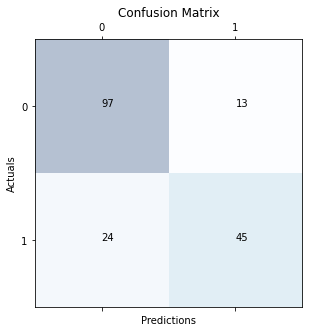

In [14]:
plt.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(x=j, y=i,s=cf_matrix[i, j])

## XGBoost

In [15]:
from xgboost import XGBClassifier

XGB_model=XGBClassifier() 
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [16]:
y_pred=XGB_model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[101   9]
 [ 15  54]]


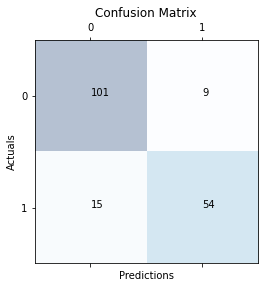

In [18]:
plt.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(x=j, y=i,s=cf_matrix[i, j])

In [19]:
from sklearn import metrics

y_pred = XGB_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'XGB_model Accuracy: {100*accracy:.3} %')
print (f'XGB_model f1_score: {100*f1_score:.3} %')
print (f'XGB_model precision: {100*precision:.3} %')
print (f'XGB_model recall: {100*recall:.3}  %')

XGB_model Accuracy: 86.6 %
XGB_model f1_score: 81.8 %
XGB_model precision: 85.7 %
XGB_model recall: 78.3  %
